In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_March23.csv


# Data Cleaning

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def clean_chunk(chunk):
    # Step 2: Drop unwanted columns
    cols_to_drop = ['ID', 'Source', 'End_Lat', 'End_Lng']
    chunk = chunk.drop(columns=[c for c in cols_to_drop if c in chunk.columns])

    
    # Step 3: Convert to datetime
    datetime_cols = ['Start_Time', 'End_Time', 'Weather_Timestamp']
    for col in datetime_cols:
        if col in chunk.columns:
            chunk[col] = pd.to_datetime(chunk[col], errors='coerce')

    
    # Step 4: Convert bool columns to int
    bool_cols = chunk.select_dtypes(include='bool').columns.tolist()
    if bool_cols:
        chunk[bool_cols] = chunk[bool_cols].astype(int)

    
    # Step 5: Encode twilight columns
    twilight_cols = ['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
    mapping = {'Day': 1, 'Night': 0}
    for col in twilight_cols:
        if col in chunk.columns:
            chunk[col] = chunk[col].map(mapping)

    return chunk
    


def load_data(file_path, chunksize=100000):
    # Step1: Load data in chunks because the dataset is large
    cleaned_chunks = []
    for i, chunk in enumerate(pd.read_csv(file_path, chunksize=chunksize)):
        print(f"Processing chunk {i+1}")
        cleaned_chunk = clean_chunk(chunk)
        cleaned_chunks.append(cleaned_chunk)

    # df_cleaned = pd.concat(cleaned_chunks, ignore_index=True)
    return cleaned_chunks


file_path = '/kaggle/input/us-accidents/US_Accidents_March23.csv'
cleaned_chunks = load_data(file_path)

df = pd.concat(cleaned_chunks, ignore_index=True)
df.head()

Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Processing chunk 7
Processing chunk 8
Processing chunk 9
Processing chunk 10
Processing chunk 11
Processing chunk 12
Processing chunk 13
Processing chunk 14
Processing chunk 15
Processing chunk 16
Processing chunk 17
Processing chunk 18
Processing chunk 19
Processing chunk 20
Processing chunk 21
Processing chunk 22
Processing chunk 23
Processing chunk 24
Processing chunk 25
Processing chunk 26
Processing chunk 27
Processing chunk 28
Processing chunk 29
Processing chunk 30
Processing chunk 31
Processing chunk 32
Processing chunk 33
Processing chunk 34
Processing chunk 35
Processing chunk 36
Processing chunk 37
Processing chunk 38
Processing chunk 39
Processing chunk 40
Processing chunk 41
Processing chunk 42
Processing chunk 43
Processing chunk 44
Processing chunk 45
Processing chunk 46
Processing chunk 47
Processing chunk 48
Processing chunk 49
Processing chunk 50
Processin

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,County,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,...,0,0,0,0,0,0,0.0,0.0,0.0,1.0
2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,...,0,0,0,0,1,0,0.0,0.0,1.0,1.0
3,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,...,0,0,0,0,0,0,0.0,1.0,1.0,1.0
4,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,...,0,0,0,0,1,0,1.0,1.0,1.0,1.0


In [5]:
df.dtypes

Severity                          int64
Start_Time               datetime64[ns]
End_Time                 datetime64[ns]
Start_Lat                       float64
Start_Lng                       float64
Distance(mi)                    float64
Description                      object
Street                           object
City                             object
County                           object
State                            object
Zipcode                          object
Country                          object
Timezone                         object
Airport_Code                     object
Weather_Timestamp        datetime64[ns]
Temperature(F)                  float64
Wind_Chill(F)                   float64
Humidity(%)                     float64
Pressure(in)                    float64
Visibility(mi)                  float64
Wind_Direction                   object
Wind_Speed(mph)                 float64
Precipitation(in)               float64
Weather_Condition                object


In [6]:
df.isnull().sum()

Severity                       0
Start_Time               1060744
End_Time                 1060744
Start_Lat                      0
Start_Lng                      0
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump                           0
Crossing                       0
Give_Way                       0
Junction                       0
No_Exit   

In [7]:
# !pip install timezonefinder
# !pip install astral

In [8]:
from timezonefinder import TimezoneFinder
from astral.sun import sun, dawn, dusk, twilight
from astral import Observer

In [9]:
import os
import time

from timezonefinder import TimezoneFinder
from astral import Observer
from astral.sun import sun, dawn, dusk, twilight
from geopy.geocoders import Nominatim

# Initialize geolocator and timezone finder
geolocator = Nominatim(user_agent="Accident_Data_Cleaner")
tf = TimezoneFinder()

# Caches for geocoding and timezone lookups
zip_cache = {}
tz_cache = {}

In [10]:
def reverse_geocode_zip(lat, lon):
    if (lat, lon) in zip_cache:
        return zip_cache[(lat, lon)]
    try:
        location = geolocator.reverse((lat, lon), exactly_one=True, timeout=10)
        if location and 'postcode' in location.raw['address']:
            zipcode = location.raw['address']['postcode']
            zip_cache[(lat, lon)] = zipcode
            return zipcode
    except Exception as e:
        print(f"Error geocoding {lat}, {lon}: {e}")
    zip_cache[(lat, lon)] = None
    return None

def get_tz_cached(lat, lon):
    key = (lat, lon)
    if key in tz_cache:
        return tz_cache[key]
    tz = tf.timezone_at(lat=lat, lng=lon)
    tz_cache[key] = tz
    return tz


In [11]:
def compute_twilight_phase(row, dawn_func, dusk_func):
    if pd.isna(row['Start_Lat']) or pd.isna(row['Start_Lng']) or pd.isna(row['Start_Time']):
        return np.nan
    obs = Observer(latitude=row['Start_Lat'], longitude=row['Start_Lng'])
    date = row['Start_Time'].date()
    try:
        dawn_time = dawn_func(obs, date=date)
        dusk_time = dusk_func(obs, date=date)
    except:
        return np.nan
    start_time = row['Start_Time']

    # Convert Start_Time to timezone-aware in dawn_time's timezone
    if start_time.tzinfo is None and dawn_time.tzinfo is not None:
        # Localize naive Start_Time to dawn_time's tz
        start_time = start_time.tz_localize(dawn_time.tzinfo)
    
    # Or alternatively, make dawn/dusk naive (less preferred):
    # dawn_time = dawn_time.replace(tzinfo=None)
    # dusk_time = dusk_time.replace(tzinfo=None)
    
    return 1 if dawn_time <= start_time < dusk_time else 0



In [12]:
def process_chunk(chunk):
    # 1. Drop rows missing all timestamps
    chunk = chunk.dropna(subset=['Start_Time', 'End_Time', 'Weather_Timestamp'], how='all').reset_index(drop=True)

    # 2. Missingness flags
    chunk['Start_Time_missing'] = chunk['Start_Time'].isna().astype(int)
    chunk['End_Time_missing'] = chunk['End_Time'].isna().astype(int)

    # 3. Impute Start_Time from Weather_Timestamp
    mask_start = chunk['Start_Time'].isna() & chunk['Weather_Timestamp'].notna()
    chunk.loc[mask_start, 'Start_Time'] = chunk.loc[mask_start, 'Weather_Timestamp']

    # 4.1 Calculate accident duration where available
    chunk['Duration'] = (chunk['End_Time'] - chunk['Start_Time']).dt.total_seconds()

    # 4.2 Compute average duration (seconds) grouped by City and Weather_Condition (only on non-missing durations)
    avg_durations = chunk.loc[chunk['Duration'].notna()].groupby(['City', 'Weather_Condition'])['Duration'].mean()

    # 4.3 Overall average duration fallback (in seconds)
    overall_avg_duration = chunk['Duration'].mean()

    # 4.4 Function to impute End_Time
    def impute_end_time(row):
        if pd.notna(row['End_Time']):
            return row['End_Time']
        key = (row['City'], row['Weather_Condition'])
        avg_dur = avg_durations.get(key, np.nan)
        if np.isnan(avg_dur):
            avg_dur = overall_avg_duration
        if pd.isna(row['Start_Time']) or pd.isna(avg_dur):
            return pd.NaT
        return row['Start_Time'] + pd.Timedelta(seconds=avg_dur)

    # 4.5 Apply imputation for missing End_Time
    chunk['End_Time'] = chunk.apply(impute_end_time, axis=1)

    # 4.6 Drop rows with missing Start_Time or End_Time
    chunk = chunk.dropna(subset=['Start_Time', 'End_Time']).reset_index(drop=True)
    
    # 5. Drop rows missing Street or City
    chunk = chunk.dropna(subset=['Street', 'City']).reset_index(drop=True)

    # 6. Clean Zipcode
    chunk['Zipcode_5digit'] = chunk['Zipcode'].astype(str).str.split('-').str[0]
    valid_zip = chunk['Zipcode_5digit'].str.match(r'^\d{5}$')
    chunk.loc[~valid_zip, 'Zipcode_5digit'] = np.nan

    # 7. Impute missing Zipcode using geopy (rate limited!)
    missing_zip = chunk['Zipcode_5digit'].isna() & chunk['Start_Lat'].notna() & chunk['Start_Lng'].notna()
    for idx in chunk[missing_zip].index:
        lat = chunk.at[idx, 'Start_Lat']
        lon = chunk.at[idx, 'Start_Lng']
        zipcode = reverse_geocode_zip(lat, lon)
        if zipcode:
            chunk.at[idx, 'Zipcode_5digit'] = str(zipcode).split('-')[0]
        time.sleep(1)  # Respect rate limit

    # 8. Impute Timezone using cache
    missing_tz = chunk['Timezone'].isna()
    chunk.loc[missing_tz, 'Timezone'] = chunk.loc[missing_tz].apply(
        lambda row: get_tz_cached(row['Start_Lat'], row['Start_Lng']), axis=1)

    # 9. Drop rows missing Airport_Code
    chunk = chunk.dropna(subset=['Airport_Code']).reset_index(drop=True)

    # 10. Impute Weather_Timestamp from Start_Time if missing
    missing_wt = chunk['Weather_Timestamp'].isna() & chunk['Start_Time'].notna()
    chunk.loc[missing_wt, 'Weather_Timestamp'] = chunk.loc[missing_wt, 'Start_Time']

    # 11. Extract Date and Hour
    chunk['Date'] = chunk['Start_Time'].dt.date
    chunk['Hour'] = chunk['Start_Time'].dt.hour

    # 12. Numeric imputations
    numeric_cols = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']
    group_cols = ['State', 'Date', 'Hour']
    for col in numeric_cols:
        group_mean = chunk.groupby(group_cols)[col].transform('mean')
        chunk[col] = chunk[col].fillna(group_mean)
        chunk[col] = chunk[col].fillna(chunk[col].mean())

    # 13. Categorical imputations
    cat_cols = ['Wind_Direction', 'Weather_Condition']
    for col in cat_cols:
        mode = chunk[col].mode()
        fill_val = mode.iloc[0] if not mode.empty else 'Unknown'
        chunk[col] = chunk[col].fillna(fill_val)

    # 14. Twilight imputations inline
    twilight_cols = [
        ('Sunrise_Sunset', 
         lambda obs, date: sun(obs, date=date)['sunrise'], 
         lambda obs, date: sun(obs, date=date)['sunset']),
        ('Civil_Twilight', dawn, dusk),
        ('Nautical_Twilight', 
         lambda obs, date: twilight(obs, date=date, depression=12, direction='dawn'), 
         lambda obs, date: twilight(obs, date=date, depression=12, direction='dusk')),
        ('Astronomical_Twilight', 
         lambda obs, date: twilight(obs, date=date, depression=18, direction='dawn'), 
         lambda obs, date: twilight(obs, date=date, depression=18, direction='dusk'))
    ]


    for col, dawn_func, dusk_func in twilight_cols:
        missing = chunk[col].isna()
        chunk.loc[missing, col] = chunk.loc[missing].apply(lambda row: compute_twilight_phase(row, dawn_func, dusk_func), axis=1)
        chunk[col] = chunk[col].replace({'Day': 1, 'Night': 0})

    # 15. Convert bool to int
    bool_cols = chunk.select_dtypes(include='bool').columns.tolist()
    if bool_cols:
        chunk[bool_cols] = chunk[bool_cols].astype(int)

    # 16. Drop helper columns
    chunk.drop(columns=['Date', 'Hour'], inplace=True)

    return chunk


In [13]:
import math

def chunk_dataframe(df, chunk_size):
    """Yield successive chunks from DataFrame."""
    num_chunks = math.ceil(len(df) / chunk_size)
    for i in range(num_chunks):
        yield df.iloc[i*chunk_size : (i+1)*chunk_size].copy()

chunk_size = 100000
cleaned_chunks = []

for i, chunk in enumerate(chunk_dataframe(df, chunk_size)):
    print(f"Processing chunk {i+1} / {math.ceil(len(df)/chunk_size)}")
    cleaned_chunk = process_chunk(chunk)
    cleaned_chunks.append(cleaned_chunk)

# Concatenate all cleaned chunks back into one DataFrame
df = pd.concat(cleaned_chunks, ignore_index=True)

df.head()

Processing chunk 1 / 78
Processing chunk 2 / 78
Processing chunk 3 / 78
Processing chunk 4 / 78
Processing chunk 5 / 78
Processing chunk 6 / 78
Processing chunk 7 / 78
Processing chunk 8 / 78
Processing chunk 9 / 78
Processing chunk 10 / 78
Processing chunk 11 / 78
Processing chunk 12 / 78
Processing chunk 13 / 78
Processing chunk 14 / 78
Processing chunk 15 / 78
Processing chunk 16 / 78
Processing chunk 17 / 78
Processing chunk 18 / 78
Processing chunk 19 / 78
Processing chunk 20 / 78
Processing chunk 21 / 78
Processing chunk 22 / 78
Processing chunk 23 / 78
Processing chunk 24 / 78
Processing chunk 25 / 78
Processing chunk 26 / 78
Processing chunk 27 / 78
Processing chunk 28 / 78
Processing chunk 29 / 78
Processing chunk 30 / 78
Processing chunk 31 / 78
Processing chunk 32 / 78
Processing chunk 33 / 78
Processing chunk 34 / 78
Processing chunk 35 / 78
Processing chunk 36 / 78
Processing chunk 37 / 78
Processing chunk 38 / 78
Processing chunk 39 / 78
Processing chunk 40 / 78
Processin

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,County,...,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Time_missing,End_Time_missing,Duration,Zipcode_5digit
0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,...,0,0,0.0,0.0,0.0,0.0,0,0,18840.0,45424
1,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,...,0,0,0.0,0.0,0.0,1.0,0,0,1800.0,43068
2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,...,1,0,0.0,0.0,1.0,1.0,0,0,1800.0,45176
3,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,...,0,0,0.0,1.0,1.0,1.0,0,0,1800.0,45417
4,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,...,1,0,1.0,1.0,1.0,1.0,0,0,1800.0,45459


In [14]:
df.isnull().sum()

Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
Distance(mi)                   0
Description                    5
Street                         0
City                           0
County                         0
State                          0
Zipcode                        0
Country                        0
Timezone                       0
Airport_Code                   0
Weather_Timestamp              0
Temperature(F)                 0
Wind_Chill(F)                  0
Humidity(%)                    0
Pressure(in)                   0
Visibility(mi)                 0
Wind_Direction                 0
Wind_Speed(mph)                0
Precipitation(in)              0
Weather_Condition              0
Amenity                        0
Bump                           0
Crossing                       0
Give_Way                       0
Junction                       0
No_Exit   

In [15]:
df = df.dropna(subset=['Description','Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], how='any').reset_index(drop=True)
df.isnull().sum()

Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
Distance(mi)                   0
Description                    0
Street                         0
City                           0
County                         0
State                          0
Zipcode                        0
Country                        0
Timezone                       0
Airport_Code                   0
Weather_Timestamp              0
Temperature(F)                 0
Wind_Chill(F)                  0
Humidity(%)                    0
Pressure(in)                   0
Visibility(mi)                 0
Wind_Direction                 0
Wind_Speed(mph)                0
Precipitation(in)              0
Weather_Condition              0
Amenity                        0
Bump                           0
Crossing                       0
Give_Way                       0
Junction                       0
No_Exit   

In [16]:
df.dtypes

Severity                          int64
Start_Time               datetime64[ns]
End_Time                 datetime64[ns]
Start_Lat                       float64
Start_Lng                       float64
Distance(mi)                    float64
Description                      object
Street                           object
City                             object
County                           object
State                            object
Zipcode                          object
Country                          object
Timezone                         object
Airport_Code                     object
Weather_Timestamp        datetime64[ns]
Temperature(F)                  float64
Wind_Chill(F)                   float64
Humidity(%)                     float64
Pressure(in)                    float64
Visibility(mi)                  float64
Wind_Direction                   object
Wind_Speed(mph)                 float64
Precipitation(in)               float64
Weather_Condition                object


In [17]:
cols = ['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
df[cols] = df[cols].astype('int8')
df.dtypes

Severity                          int64
Start_Time               datetime64[ns]
End_Time                 datetime64[ns]
Start_Lat                       float64
Start_Lng                       float64
Distance(mi)                    float64
Description                      object
Street                           object
City                             object
County                           object
State                            object
Zipcode                          object
Country                          object
Timezone                         object
Airport_Code                     object
Weather_Timestamp        datetime64[ns]
Temperature(F)                  float64
Wind_Chill(F)                   float64
Humidity(%)                     float64
Pressure(in)                    float64
Visibility(mi)                  float64
Wind_Direction                   object
Wind_Speed(mph)                 float64
Precipitation(in)               float64
Weather_Condition                object


In [18]:
# convert int64 to int8 for better memory usage
# all the columns have only 2 unique values: 0 & 1. Hence int8 is suitable to use.
int64_cols = df.select_dtypes(include='int64').columns
df[int64_cols] = df[int64_cols].astype('int8')
df.dtypes

Severity                           int8
Start_Time               datetime64[ns]
End_Time                 datetime64[ns]
Start_Lat                       float64
Start_Lng                       float64
Distance(mi)                    float64
Description                      object
Street                           object
City                             object
County                           object
State                            object
Zipcode                          object
Country                          object
Timezone                         object
Airport_Code                     object
Weather_Timestamp        datetime64[ns]
Temperature(F)                  float64
Wind_Chill(F)                   float64
Humidity(%)                     float64
Pressure(in)                    float64
Visibility(mi)                  float64
Wind_Direction                   object
Wind_Speed(mph)                 float64
Precipitation(in)               float64
Weather_Condition                object


In [19]:
df['Timezone'].value_counts()

Timezone
US/Eastern     3543478
US/Pacific     2053132
US/Central     1636197
US/Mountain     427173
Name: count, dtype: int64

In [20]:
df['Wind_Direction'].value_counts()

Wind_Direction
CALM        1070761
S            417645
Calm         392210
SSW          383203
W            381777
WNW          377188
NW           367843
SW           362968
WSW          352297
SSE          347572
NNW          331928
N            305227
SE           293725
E            277242
ESE          267154
NE           257414
ENE          257346
NNE          254162
VAR          249301
South        177366
West         164746
North        153379
Variable     113993
East         103533
Name: count, dtype: int64

In [21]:
# Normalize text to uppercase and strip spaces
df['Wind_Direction_clean'] = df['Wind_Direction'].astype(str).str.strip().str.upper()

# Define a clear mapping from variants to standard abbreviations
standardize_map = {
    'CALM': 'CALM',
    'S': 'S',
    'SOUTH': 'S',
    'SSW': 'SSW',
    'SW': 'SW',
    'WSW': 'WSW',
    'WNW': 'WNW',
    'NW': 'NW',
    'N': 'N',
    'NORTH': 'N',
    'NNW': 'NNW',
    'NNE': 'NNE',
    'NE': 'NE',
    'ENE': 'ENE',
    'E': 'E',
    'EAST': 'E',
    'ESE': 'ESE',
    'SE': 'SE',
    'SSE': 'SSE',
    'VAR': 'VAR',
    'VARIABLE': 'VAR',
    'W': 'W',
    'WEST': 'W'
}

# Map values, leave unknowns as they are or replace with 'UNKNOWN'
df['Wind_Direction_clean'] = df['Wind_Direction_clean'].map(standardize_map).fillna('UNKNOWN')

# Optional: check result counts
print(df['Wind_Direction_clean'].value_counts())


Wind_Direction_clean
CALM    1462971
S        595011
W        546523
N        458606
SSW      383203
E        380775
WNW      377188
NW       367843
VAR      363294
SW       362968
WSW      352297
SSE      347572
NNW      331928
SE       293725
ESE      267154
NE       257414
ENE      257346
NNE      254162
Name: count, dtype: int64


In [22]:
df['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle',
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow', 'Hea

In [23]:
# Full mapping dictionary: map many variants to clean categories
weather_mapping = {
    # Light rain variants
    'LIGHT RAIN': 'Light Rain',
    'LIGHT RAIN SHOWER': 'Light Rain',
    'LIGHT RAIN SHOWERS': 'Light Rain',
    'RAIN SHOWERS': 'Rain',
    'RAIN SHOWER': 'Rain',
    'RAIN': 'Rain',
    'HEAVY RAIN': 'Heavy Rain',
    'HEAVY RAIN SHOWERS': 'Heavy Rain',
    'HEAVY RAIN / WINDY': 'Heavy Rain',
    'RAIN / WINDY': 'Rain',
    'DRIZZLE': 'Drizzle',
    'LIGHT DRIZZLE': 'Drizzle',
    'HEAVY DRIZZLE': 'Drizzle',

    # Thunderstorm variants
    'THUNDERSTORM': 'Thunderstorm',
    'THUNDERSTORMS AND RAIN': 'Thunderstorm',
    'THUNDER / WINDY': 'Thunderstorm',
    'THUNDER': 'Thunderstorm',
    'THUNDER IN THE VICINITY': 'Thunderstorm',
    'THUNDER AND HAIL': 'Thunderstorm',
    'T-STORM': 'Thunderstorm',
    'HEAVY THUNDERSTORMS AND RAIN': 'Thunderstorm',
    'HEAVY THUNDERSTORMS WITH SMALL HAIL': 'Thunderstorm',
    'HEAVY THUNDERSTORMS AND SNOW': 'Thunderstorm',
    'LIGHT THUNDERSTORMS AND RAIN': 'Thunderstorm',
    'LIGHT THUNDERSTORM': 'Thunderstorm',
    'THUNDERSTORMS AND SNOW': 'Thunderstorm',

    # Snow and sleet variants
    'SNOW': 'Snow',
    'SNOW SHOWERS': 'Snow',
    'LIGHT SNOW SHOWER': 'Light Snow',
    'LIGHT SNOW SHOWERS': 'Light Snow',
    'LIGHT SNOW': 'Light Snow',
    'HEAVY SNOW': 'Heavy Snow',
    'HEAVY SNOW / WINDY': 'Heavy Snow',
    'SNOW AND SLEET': 'Snow/Sleet',
    'SNOW / WINDY': 'Snow',
    'LIGHT SLEET': 'Sleet',
    'SLEET': 'Sleet',
    'LIGHT SNOW AND SLEET': 'Snow/Sleet',
    'LIGHT SNOW AND SLEET / WINDY': 'Snow/Sleet',
    'SNOW AND SLEET / WINDY': 'Snow/Sleet',
    'SLEET / WINDY': 'Sleet',
    'HEAVY FREEZING RAIN': 'Freezing Rain',
    'HEAVY FREEZING RAIN / WINDY': 'Freezing Rain',
    'FREEZING RAIN': 'Freezing Rain',
    'FREEZING DRIZZLE': 'Freezing Drizzle',
    'LIGHT FREEZING DRIZZLE': 'Freezing Drizzle',
    'LIGHT FREEZING RAIN': 'Freezing Rain',
    'LIGHT FREEZING RAIN / WINDY': 'Freezing Rain',

    # Fog variants
    'FOG': 'Fog',
    'PATCHES OF FOG': 'Fog',
    'PARTIAL FOG': 'Fog',
    'SHALLOW FOG': 'Fog',
    'FOG / WINDY': 'Fog',

    # Cloudy and related
    'OVERCAST': 'Cloudy',
    'MOSTLY CLOUDY': 'Cloudy',
    'MOSTLY CLOUDY / WINDY': 'Cloudy',
    'CLOUDY': 'Cloudy',
    'CLOUDY / WINDY': 'Cloudy',
    'PARTLY CLOUDY': 'Partly Cloudy',
    'PARTLY CLOUDY / WINDY': 'Partly Cloudy',

    # Clear and fair
    'CLEAR': 'Clear',
    'FAIR': 'Fair',
    'FAIR / WINDY': 'Fair',

    # Wind / dust related
    'BLOWING DUST': 'Dust',
    'BLOWING SAND': 'Dust',
    'WIDESPREAD DUST': 'Dust',
    'DUST WHIRLS': 'Dust',
    'DUSTSTORM': 'Dust',
    'SAND / DUST WHIRLS NEARBY': 'Dust',
    'SAND / DUST WHIRLS': 'Dust',
    'SAND': 'Dust',
    'SAND / WINDY': 'Dust',

    # Calm and variable
    'CALM': 'Calm',
    'CALM.': 'Calm',
    'VAR': 'Variable',
    'VARIABLE': 'Variable',

    # Others
    'HAIL': 'Hail',
    'SMOKE': 'Smoke',
    'HEAVY SMOKE': 'Smoke',
    'VOLCANIC ASH': 'Volcanic Ash',
    'FUNNEL CLOUD': 'Funnel Cloud',
    'TORNADO': 'Tornado',
    'SQUALLS': 'Squalls',
    'SNOW GRAINS': 'Snow Grains',
    'LIGHT HAIL': 'Hail',
    'SMOKE / WINDY': 'Smoke',
    'WINTRY MIX': 'Wintry Mix',
    'WINTRY MIX / WINDY': 'Wintry Mix',
    'BLIZZARD': 'Blizzard',
    'N/A PRECIPITATION': 'Unknown',
    'SHOWERS IN THE VICINITY': 'Showers',
    'RAIN SHOWERS': 'Rain',
    'RAIN SHOWER / WINDY': 'Rain',
    'HEAVY RAIN SHOWER': 'Heavy Rain',
    'HEAVY RAIN SHOWER / WINDY': 'Heavy Rain',
    'LIGHT RAIN SHOWER': 'Light Rain',
    'LIGHT RAIN SHOWER / WINDY': 'Light Rain',
    'DRIZZLE AND FOG': 'Drizzle',
    'LIGHT DRIZZLE / WINDY': 'Drizzle',
    'SLEET AND THUNDER': 'Sleet',
    'DRIFTING SNOW': 'Snow',
    'DRIFTING SNOW / WINDY': 'Snow',
    'LIGHT BLOWING SNOW': 'Snow',
    'LIGHT SNOW WITH THUNDER': 'Light Snow',
    'SNOW AND THUNDER': 'Snow',
    'SNOW AND THUNDER / WINDY': 'Snow',
    'SAND / DUST WHIRLWINDS': 'Dust',
    'SAND / DUST WHIRLWINDS / WINDY': 'Dust',
    'LIGHT SNOW SHOWER / WINDY': 'Light Snow',
    'LIGHT SNOW GRAINS': 'Light Snow',
    'HEAVY THUNDERSTORMS AND RAIN': 'Thunderstorm',
    'HEAVY T-STORM': 'Thunderstorm',
    'HEAVY T-STORM / WINDY': 'Thunderstorm',
    'LIGHT THUNDERSTORMS AND SNOW': 'Thunderstorm',
    'THUNDERSTORMS AND SNOW': 'Thunderstorm',
    'THUNDER / WINTRY MIX': 'Thunderstorm',
    'THUNDER / WINTRY MIX / WINDY': 'Thunderstorm',
    'HEAVY SLEET': 'Sleet',
    'LIGHT SLEET / WINDY': 'Sleet',
    'SLEET / WINDY': 'Sleet',
    'HEAVY FREEZING DRIZZLE': 'Freezing Drizzle',
    'HEAVY FREEZING DRIZZLE / WINDY': 'Freezing Drizzle',
    'SAND / WINDY': 'Dust',
    'BLIZZING SNOW': 'Snow',
    # Add more mappings as needed
}

# Normalize your column before mapping
df['Weather_Condition_clean'] = df['Weather_Condition'].astype(str).str.strip().str.upper()

# Map to clean categories; unknowns get 'Other'
df['Weather_Condition_clean'] = df['Weather_Condition_clean'].map(weather_mapping).fillna('Other')

# Check the cleaned value counts
print(df['Weather_Condition_clean'].value_counts())


Weather_Condition_clean
Fair                2670119
Cloudy              2241446
Clear                855731
Partly Cloudy        706663
Light Rain           351937
Other                318474
Light Snow           128025
Fog                  106759
Rain                  86515
Thunderstorm          73585
Heavy Rain            33687
Drizzle               28363
Snow                  16715
Smoke                 12738
Wintry Mix            11893
Heavy Snow             5861
Freezing Rain          3721
Unknown                3217
Showers                1496
Freezing Drizzle       1271
Snow/Sleet              681
Sleet                   479
Dust                    456
Hail                     41
Squalls                  35
Funnel Cloud             22
Volcanic Ash             22
Tornado                  19
Snow Grains               9
Name: count, dtype: int64


In [24]:
df['City'] = df['City'].astype(str).str.title()
df['City'].unique()

array(['Dayton', 'Reynoldsburg', 'Williamsburg', ..., 'Ness City',
       'Clarksdale', 'American Fork-Pleasant Grove'], dtype=object)

In [43]:
import re

def standardize_city_name(name):
    name = str(name)
    # Replace hyphens with spaces
    name = name.replace('-', ' ')
    # Insert space before capital letters that follow lowercase letters (e.g., 'NewDelhi' -> 'New Delhi')
    name = re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', name)
    # Normalize spaces (remove extra spaces)
    name = re.sub(r'\s+', ' ', name)
    # Strip leading/trailing spaces
    name = name.strip()
    # Convert to title case
    name = name.title()
    return name

df['City_clean'] = df['City'].apply(standardize_city_name)



In [26]:
!pip install tabulate

In [27]:
unique_cities = sorted(df['City_clean'].unique())

num_cols = 6
col_width = 25  

# Pad list to fill rows completely
import math
num_rows = math.ceil(len(unique_cities) / num_cols)
padded = unique_cities + [''] * (num_rows * num_cols - len(unique_cities))

# Prepare horizontal border line
border = '+' + '+'.join(['-' * col_width] * num_cols) 

print(border)
for row_idx in range(num_rows):
    row_items = padded[row_idx * num_cols:(row_idx + 1) * num_cols]
    # Format each cell to fixed width, left aligned
    row_str = '|'.join(item.ljust(col_width) for item in row_items)
    print('|' + row_str + '|')
    print(border)


+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------
|Aaronsburg               |Abbeville                |Abbotsford               |Abbott                   |Abbottstown              |Aberdeen                 |
+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------
|Aberdeen Proving Ground  |Abernathy                |Abilene                  |Abingdon                 |Abington                 |Abiquiu                  |
+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------
|Abita Springs            |Abrams                   |Absarokee                |Absecon                  |Acampo                   |Accident                 |
+-------------------------+-------------------------+--

In [28]:
df['State'].value_counts()

State
CA    1731487
FL     872794
TX     581329
SC     377608
NY     346259
NC     335348
PA     293285
VA     291655
MN     191567
OR     177690
AZ     169548
IL     168439
GA     168271
TN     166912
MI     161911
LA     149204
NJ     138545
MD     136857
OH     117511
WA     108093
AL     100771
UT      94820
CO      90179
OK      83625
MO      74254
CT      70645
IN      66806
MA      61944
WI      34514
KY      31986
NE      28650
MT      27748
IA      25942
AR      21816
NV      21460
KS      20718
DC      18437
RI      16947
MS      15012
DE      14019
WV      13245
ID      11336
NM      10219
NH      10201
WY       3510
ND       3016
ME       2690
VT        919
SD        238
Name: count, dtype: int64

In [29]:
df['Country'].value_counts()

Country
US    7659980
Name: count, dtype: int64

# Data Visualization

In [30]:
df['Year'] = df['Start_Time'].dt.year

# Aggregate counts by State, City, Year
agg = df.groupby(['Year', 'State', 'City']).size().reset_index(name='Accident_Count')

# aggregate by Year, State only for top-level view
agg_state = df.groupby(['Year', 'State']).size().reset_index(name='Accident_Count')


In [31]:
import plotly.express as px

for year in range(2016, 2024):
    df_year = agg_state[agg_state['Year'] == year]
    fig = px.choropleth(df_year,
                        locations='State',
                        locationmode="USA-states",
                        color='Accident_Count',
                        scope="usa",
                        title=f"US Accidents by State in {year}",
                        color_continuous_scale="Reds")
    fig.show()


In [32]:
accidents_by_weather = df.groupby('Weather_Condition_clean').size().reset_index(name='Accident_Count')

# Sort by count descending for better visualization
accidents_by_weather = accidents_by_weather.sort_values('Accident_Count', ascending=False)


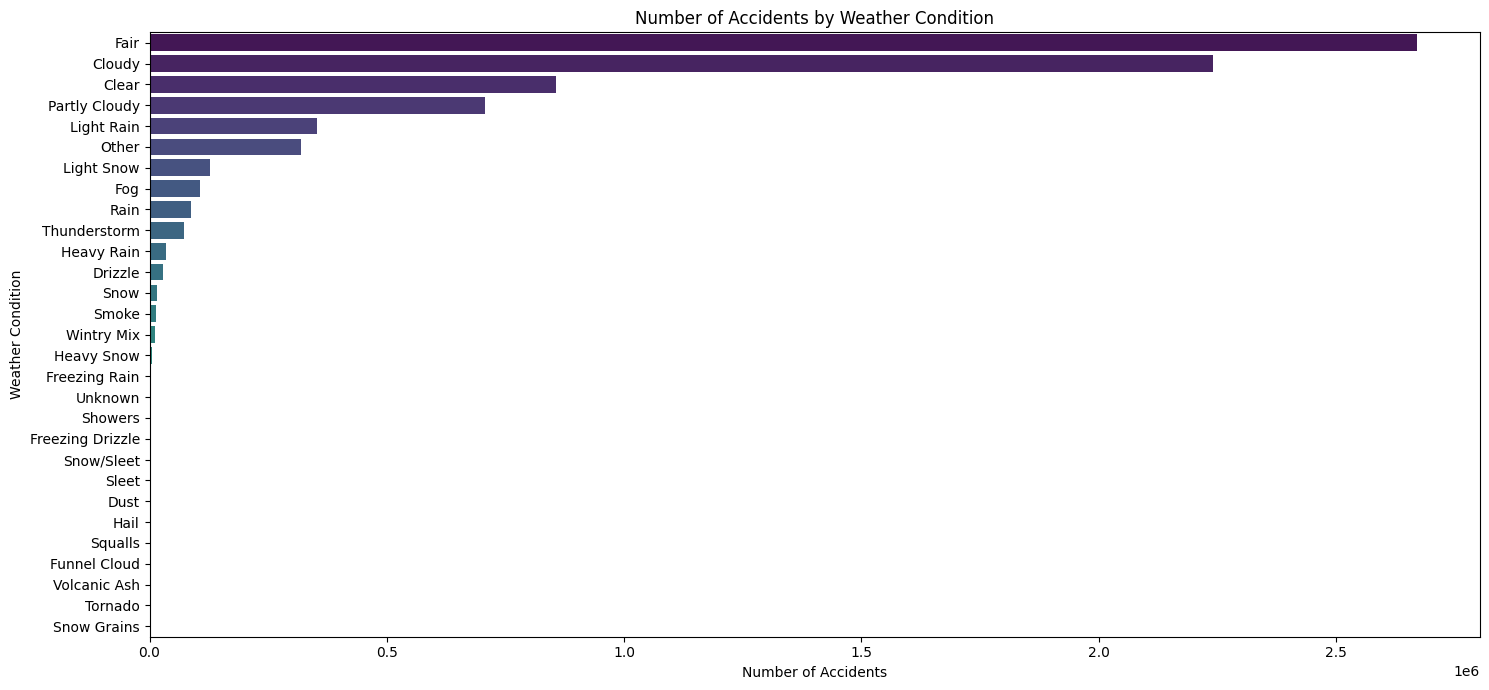

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,7))
sns.barplot(data=accidents_by_weather, x='Accident_Count', y='Weather_Condition_clean', palette='viridis')

plt.title('Number of Accidents by Weather Condition')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.tight_layout()
plt.show()


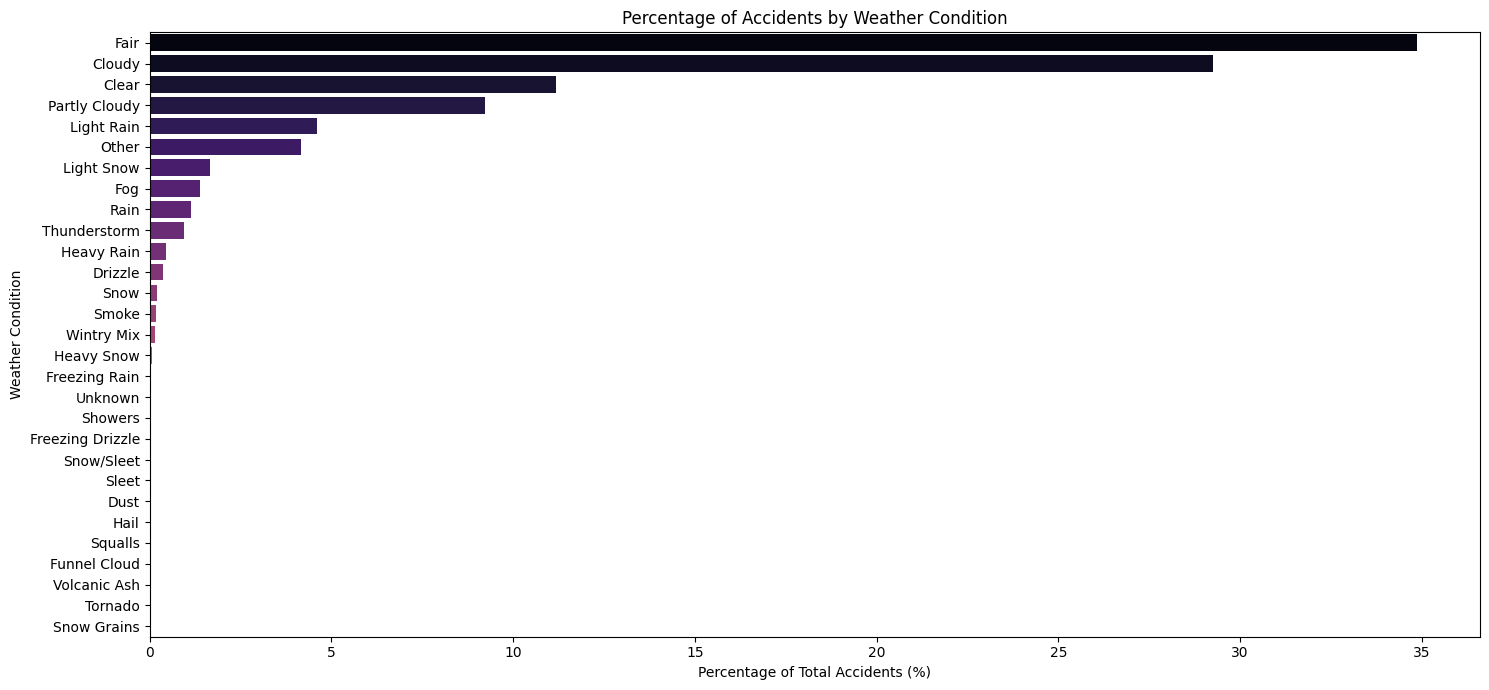

In [34]:
total_accidents = accidents_by_weather['Accident_Count'].sum()
accidents_by_weather['Percentage'] = 100 * accidents_by_weather['Accident_Count'] / total_accidents

plt.figure(figsize=(15,7))
sns.barplot(data=accidents_by_weather, x='Percentage', y='Weather_Condition_clean', palette='magma')

plt.title('Percentage of Accidents by Weather Condition')
plt.xlabel('Percentage of Total Accidents (%)')
plt.ylabel('Weather Condition')
plt.tight_layout()
plt.show()


/tmp/ipykernel_198/2504405725.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



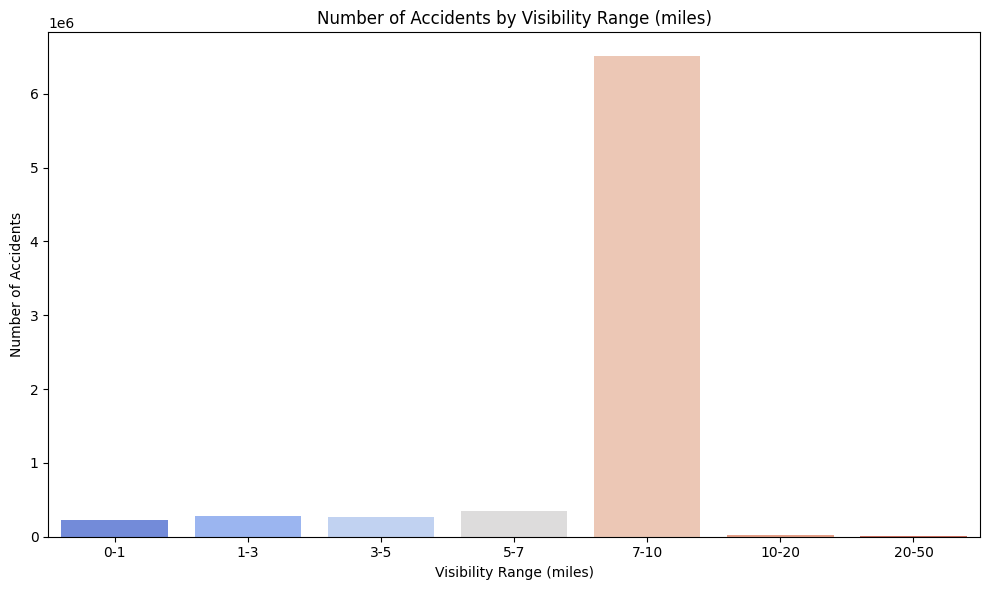

In [35]:
import pandas as pd

bins = [0, 1, 3, 5, 7, 10, 20, 50]
labels = ['0-1', '1-3', '3-5', '5-7', '7-10', '10-20', '20-50']

df['Visibility_bin'] = pd.cut(df['Visibility(mi)'], bins=bins, labels=labels, include_lowest=True)

accidents_by_visibility = df.groupby('Visibility_bin').size().reset_index(name='Accident_Count')

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(data=accidents_by_visibility, x='Visibility_bin', y='Accident_Count', palette='coolwarm')

plt.title('Number of Accidents by Visibility Range (miles)')
plt.xlabel('Visibility Range (miles)')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()


In [36]:
additional_cols = [
    'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
    'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
    'Traffic_Signal', 'Turning_Loop'
]

# Convert columns to boolean if not already
df[additional_cols] = df[additional_cols].astype(bool)

# Accident counts grouped by each feature (present/absent)
counts = {}
for col in additional_cols:
    counts[col] = df.groupby(col).size().rename({True: 'Present', False: 'Absent'})
    
# Combine all into one DataFrame for plotting
counts_df = pd.DataFrame(counts).T.fillna(0)
print(counts_df)


                    Absent    Present
Amenity          7564067.0    95913.0
Bump             7656487.0     3493.0
Crossing         6788584.0   871396.0
Give_Way         7624015.0    35965.0
Junction         7095484.0   564496.0
No_Exit          7640518.0    19462.0
Railway          7593300.0    66680.0
Roundabout       7659731.0      249.0
Station          7458739.0   201241.0
Stop             7446910.0   213070.0
Traffic_Calming  7652420.0     7560.0
Traffic_Signal   6520123.0  1139857.0
Turning_Loop     7659980.0        0.0


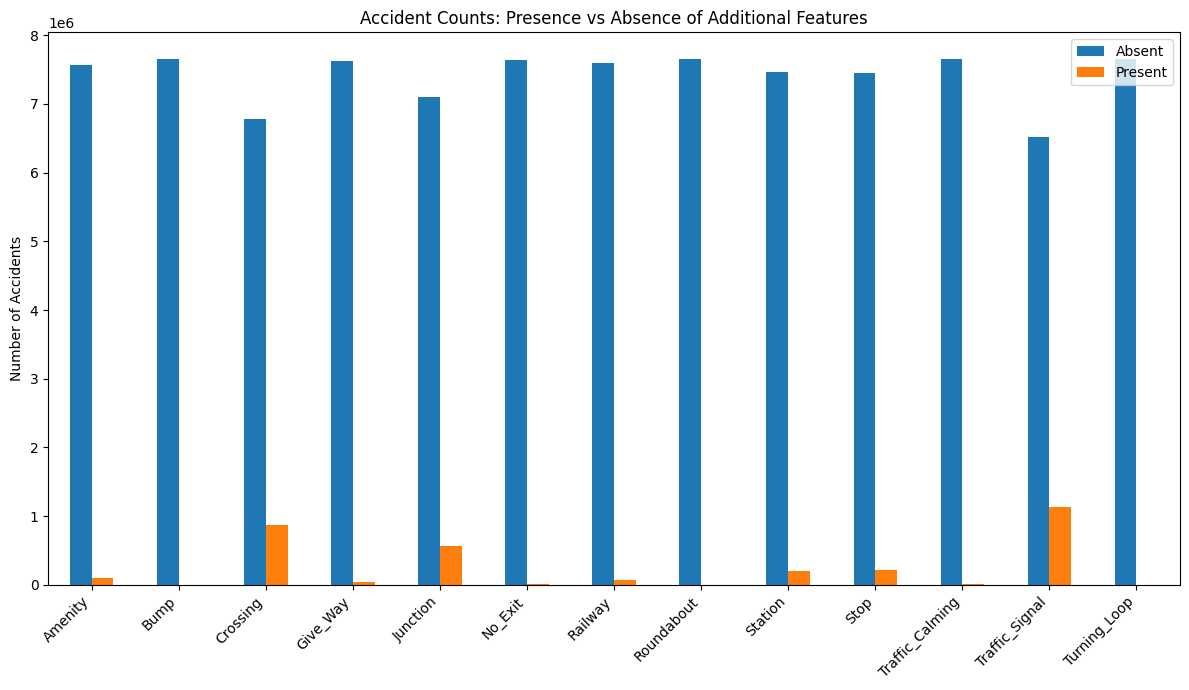

In [37]:
counts_df.plot(kind='bar', stacked=False, figsize=(12,7))
plt.title('Accident Counts: Presence vs Absence of Additional Features')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


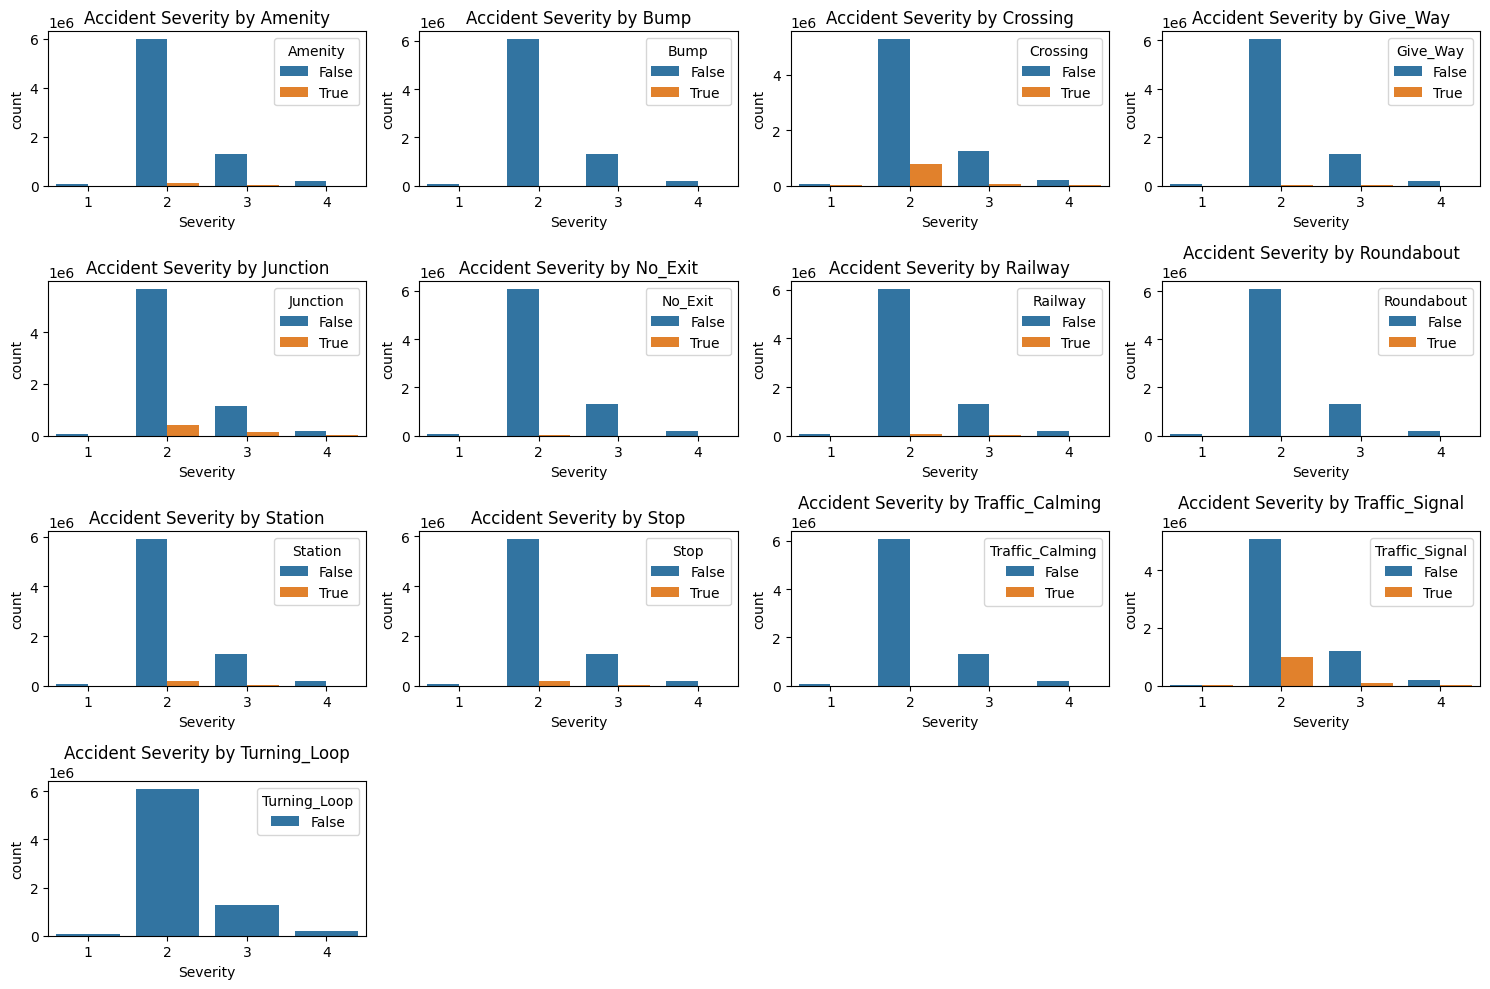

In [38]:
import seaborn as sns
import warnings

plt.figure(figsize=(15, 10))
with warnings.catch_warnings():
    warnings.simplefilter("ignore")  # Ignore all warnings inside this block
    for i, col in enumerate(additional_cols, 1):
        plt.subplot(4, 4, i)
        sns.countplot(x='Severity', hue=col, data=df)
        plt.title(f'Accident Severity by {col}')
        plt.legend(title=col, loc='upper right')
        plt.tight_layout()
plt.show()


# in severity 1 indicates least severe accident and 4 indicates most severe accident.

In [39]:
df['Accident_Duration'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 60  # duration in minutes

duration_by_city = df.groupby('City').agg(
    Avg_Duration=('Accident_Duration', 'mean'),
    Count=('Accident_Duration', 'count')
).reset_index()


# Compute mean lat/lon per city
city_coords = df.groupby('City').agg(
    Latitude=('Start_Lat', 'mean'),
    Longitude=('Start_Lng', 'mean')
).reset_index()

# Merge with duration stats
city_stats = duration_by_city.merge(city_coords, on='City')

import plotly.express as px

fig = px.scatter_mapbox(
    city_stats,
    lat='Latitude',
    lon='Longitude',
    size='Count',               # marker size by accident count
    color='Avg_Duration',       # marker color by average duration in minutes
    color_continuous_scale='Viridis',
    size_max=30,
    zoom=4,
    mapbox_style='open-street-map',
    hover_name='City',
    hover_data={'Avg_Duration': ':.1f', 'Count': True}
)
fig.update_layout(title='Average Accident Duration by City')
fig.show()


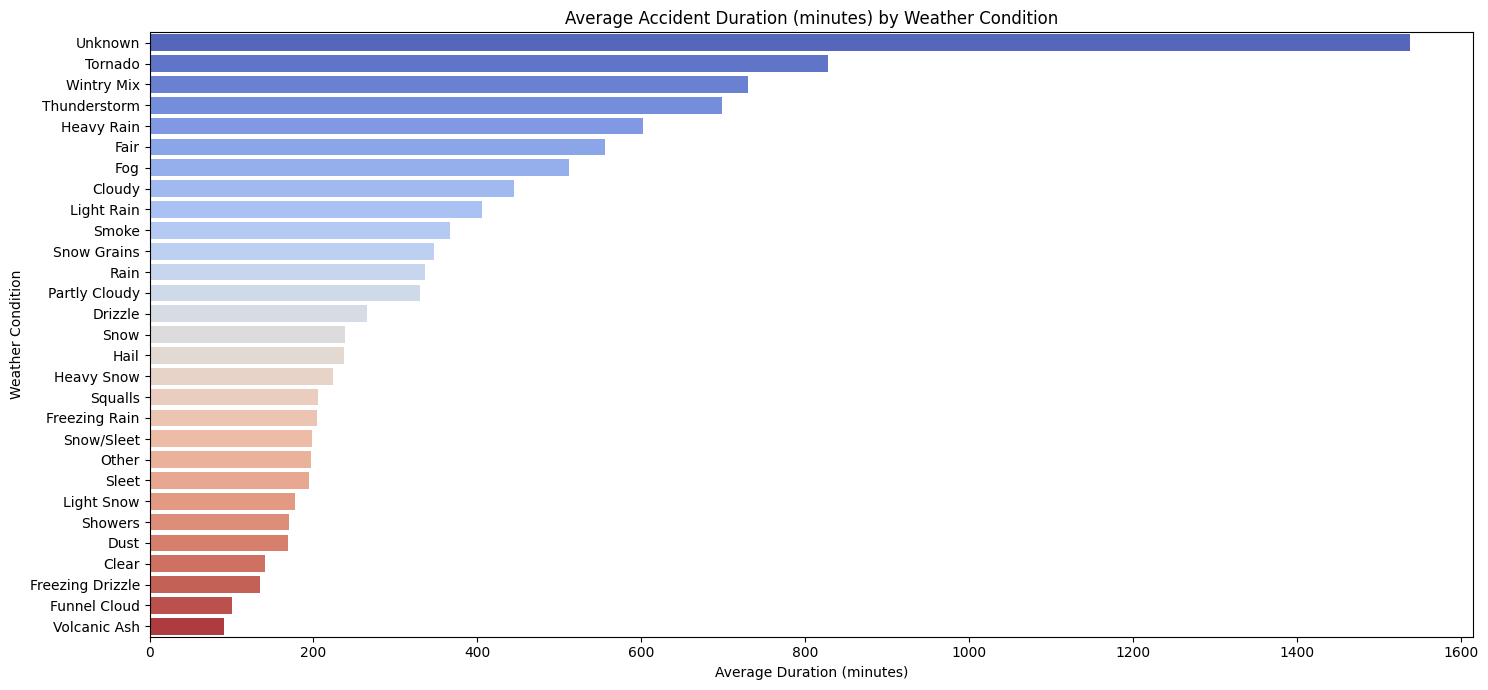

In [40]:
avg_duration_weather = df.groupby('Weather_Condition_clean').agg(
    Avg_Duration=('Accident_Duration', 'mean'),
    Count=('Accident_Duration', 'count')
).reset_index()

# Sort by average duration for better visualization
avg_duration_weather = avg_duration_weather.sort_values('Avg_Duration', ascending=False)

plt.figure(figsize=(15,7))
sns.barplot(data=avg_duration_weather, x='Avg_Duration', y='Weather_Condition_clean', palette='coolwarm')

plt.title('Average Accident Duration (minutes) by Weather Condition')
plt.xlabel('Average Duration (minutes)')
plt.ylabel('Weather Condition')
plt.tight_layout()
plt.show()


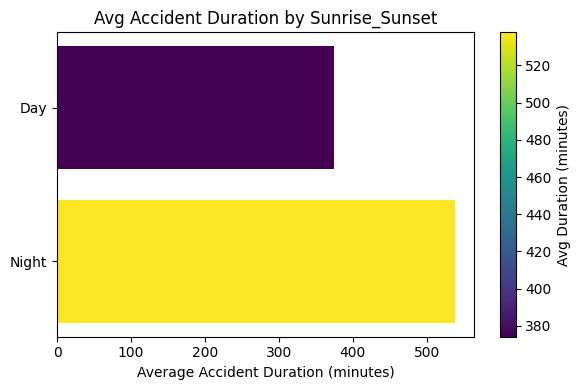

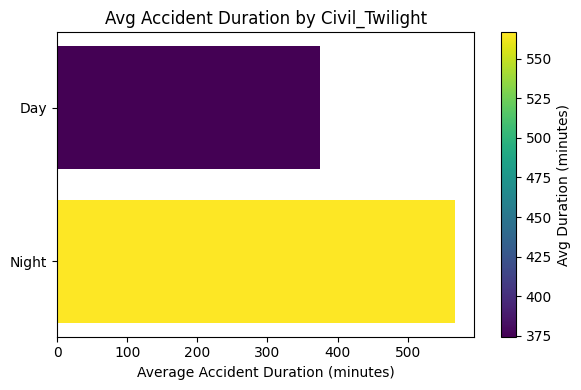

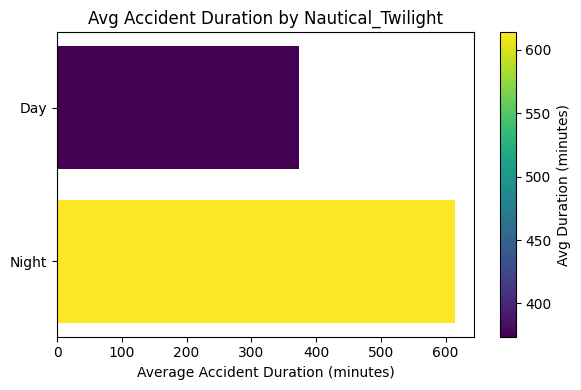

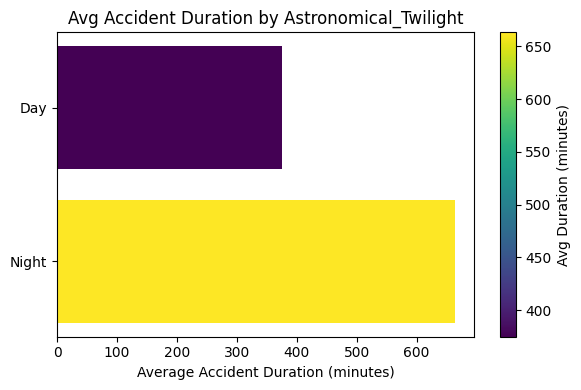

In [41]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

twilight_cols = ['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

for col in twilight_cols:
    # Group by twilight phase (0 or 1) and calculate average duration
    agg = df.groupby(col)['Accident_Duration'].mean().reset_index()
    
    phases = agg[col].map({0: 'Night', 1: 'Day'})
    durations = agg['Accident_Duration']
    
    norm = mcolors.Normalize(vmin=durations.min(), vmax=durations.max())
    cmap = cm.viridis
    colors = cmap(norm(durations))
    
    fig, ax = plt.subplots(figsize=(6,4))
    bars = ax.barh(phases, durations, color=colors)
    ax.set_xlabel('Average Accident Duration (minutes)')
    ax.set_title(f'Avg Accident Duration by {col}')
    
    # Colorbar
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label('Avg Duration (minutes)')
    
    plt.tight_layout()
    plt.show()


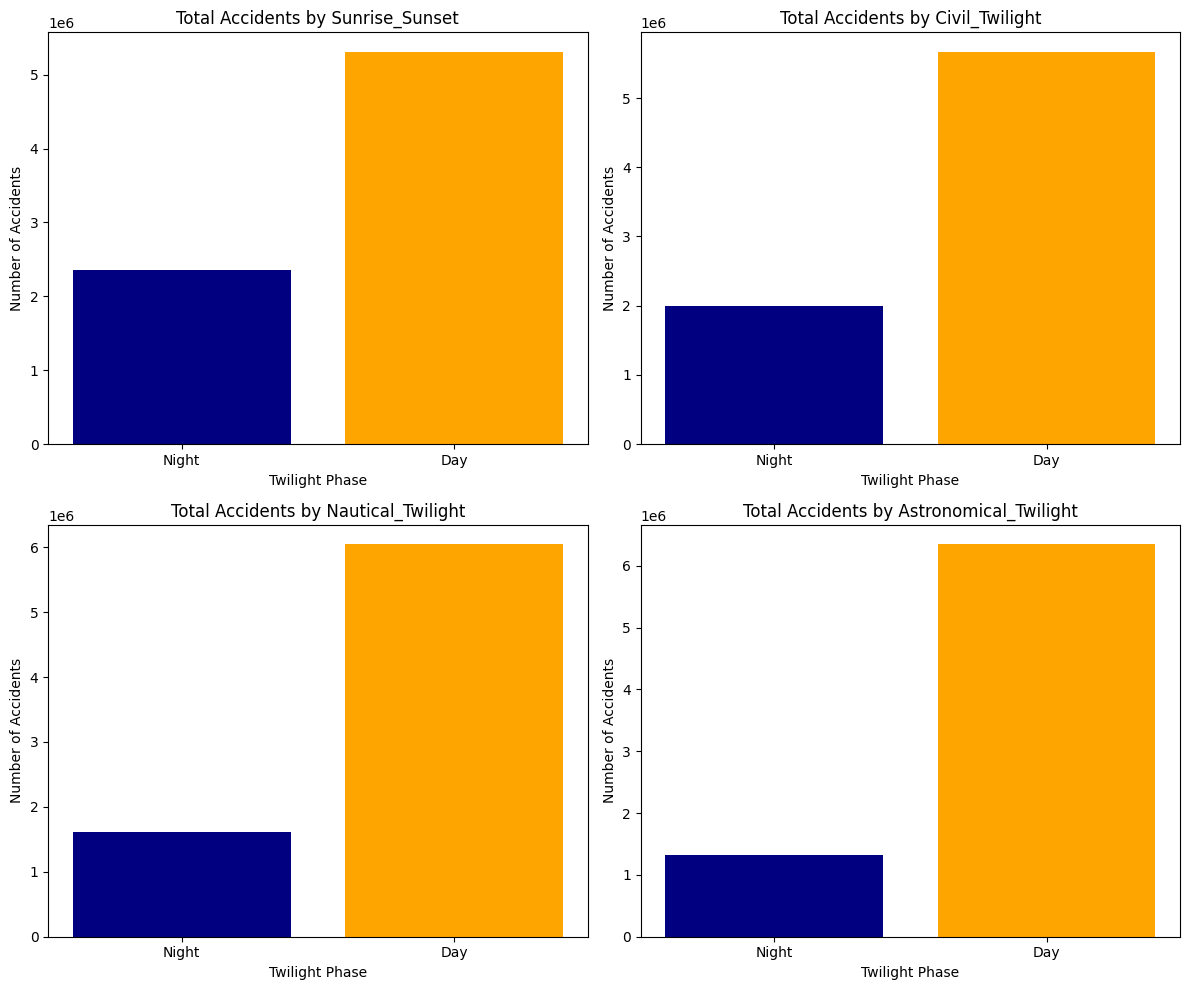

In [42]:
twilight_cols = ['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

counts_dict = {}
for col in twilight_cols:
    counts = df.groupby(col).size().reset_index(name='Accident_Count')
    counts[col] = counts[col].map({0: 'Night', 1: 'Day'})
    counts_dict[col] = counts


import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

for i, col in enumerate(twilight_cols):
    counts = counts_dict[col]
    axs[i].bar(counts[col], counts['Accident_Count'], color=['navy', 'orange'])
    axs[i].set_title(f'Total Accidents by {col}')
    axs[i].set_xlabel('Twilight Phase')
    axs[i].set_ylabel('Number of Accidents')

plt.tight_layout()
plt.show()
